<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/8%EC%9D%BC%EC%B0%A8/odds_ratio_logit_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률(Probability)과 오즈비(odds ratio)**
- **확률**: 이벤트가 발생할 확률을 𝑃 라고 표현할 수 있습니다.

\begin{equation}
P
\end{equation}
- **오즈(odds)**: 다른 사건의 확률에 대한 비율
- **[과천경마장](https://race.kra.co.kr/seoulMain.do): 배당률**
\begin{equation}
\text{Odds of }(P) = \left(\frac{P}{1 - P}\right)
\end{equation}

\begin{equation}
\text{Odds of }(1 - P) = \left(\frac{1 - P}{P}\right)
\end{equation}

- **로짓 함수**:로짓 함수는 확률 𝑃 오즈(odds)에 자연 로그를 취한 것입니다.

\begin{equation}
\text{Logit}(P) = \log\left(\frac{P}{1 - P}\right)
\end{equation}

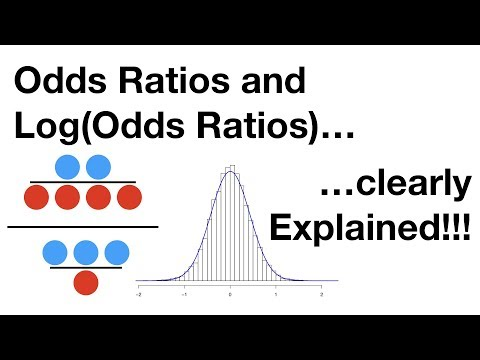

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('8nm0G-1uJzA')


<img src='https://assets.cureus.com/uploads/figure/file/138481/article_river_65ee62a0db3611eaafa31b2789baa093-fig-1-odds-vs-prob.png' width=600>


In [ ]:
# prompt: 확률이 0과 1사이 100개 구간으로 존재할 경우 odd ration와 logit, softmax 값을 데이터프레임으로 만들어라, 컬럼명을 잘서달라
import pandas as pd
import numpy as np

# 확률 0과 1사이 100개 구간 생성
probabilities = np.linspace(0.01, 0.99, 100)

# 오즈비 계산
odds_ratio = probabilities / (1 - probabilities)

# logit 계산
logit = np.log(odds_ratio)

# softmax 계산
softmax = np.exp(logit) / (1 + np.exp(logit))

# 데이터프레임 생성
df = pd.DataFrame({
    'Probability': probabilities,
    'Odds Ratio': odds_ratio,
    'Logit': logit,
    'Softmax': softmax
})

# 컬럼명 설정
df.columns = ['Probability', 'Odds Ratio', 'Logit', 'Softmax']

# 데이터프레임 출력
df

,Probability,Odds Ratio,Logit,Softmax
0,0.010000,0.010101,-4.595120,0.010000
1,0.019899,0.020303,-3.896987,0.019899
2,0.029798,0.030713,-3.483064,0.029798
3,0.039697,0.041338,-3.185974,0.039697
4,0.049596,0.052184,-2.952978,0.049596
...,...,...,...,...
95,0.950404,19.162933,2.952978,0.950404
96,0.960303,24.190840,3.185974,0.960303
97,0.970202,32.559322,3.483064,0.970202
98,0.980101,49.253807,3.896987,0.980101


<img src="https://velog.velcdn.com/images/zlddp723/post/3eb60dde-022f-4b47-b01e-ce45d4bfb78f/image.png">

- 오즈비의 경우 분모가 분자보다 크면 0과 1사이에 존재하고 그 반대는 무한대까지 0을 중심으로 간격이 다르게 되어 등간척도를 갖기위해 로그를 취한 것을 logit이라 한다.

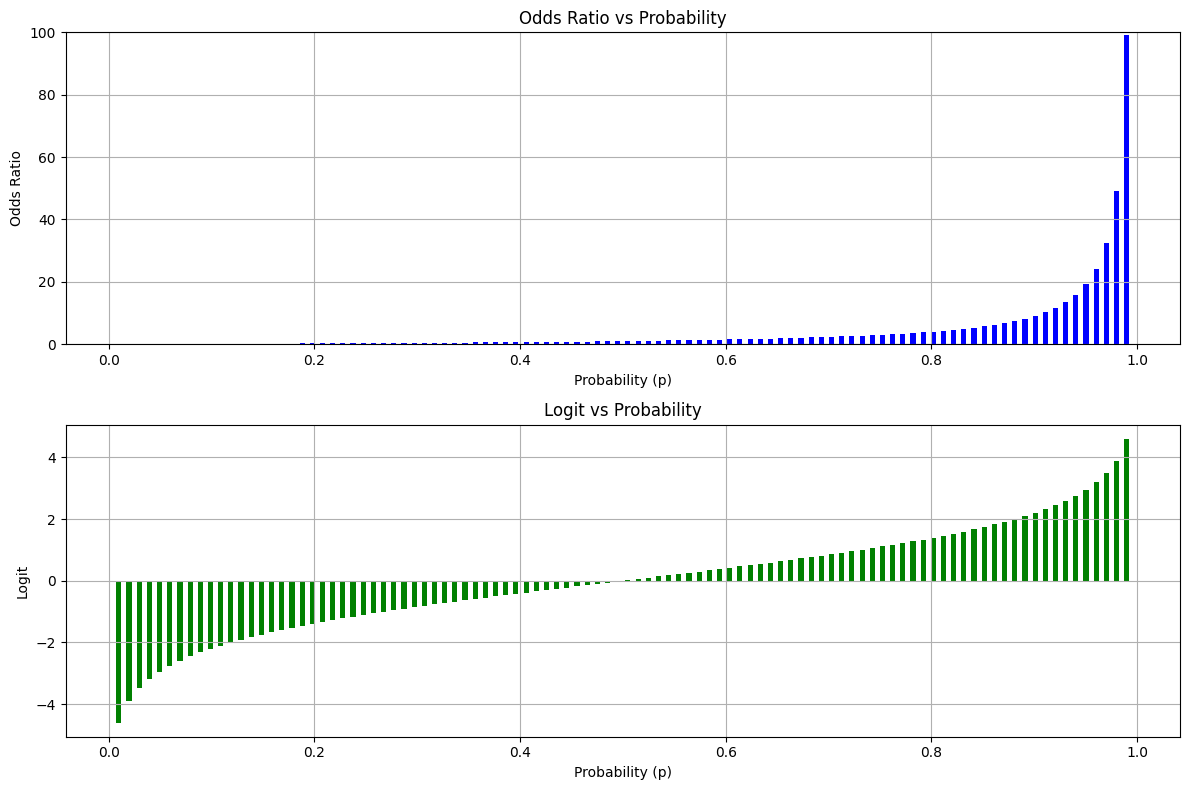

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 확률 p의 범위 (0에서 1 사이)
p = np.linspace(0.01, 0.99, 100)

# 오즈비 계산
odds = p / (1 - p)

# 로짓 변환
logit = np.log(odds)

# 시각화
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# 오즈비 플롯 (막대 그래프)
ax[0].bar(p, odds, width=0.005, color='blue')
ax[0].set_xlabel('Probability (p)')
ax[0].set_ylabel('Odds Ratio')
ax[0].set_title('Odds Ratio vs Probability')
ax[0].set_ylim(0, 100)
ax[0].grid(True)

# 로짓 플롯 (막대 그래프)
ax[1].bar(p, logit, width=0.005, color='green')
ax[1].set_xlabel('Probability (p)')
ax[1].set_ylabel('Logit')
ax[1].set_title('Logit vs Probability')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df['logistic regression'] = 1 / (1 + np.exp(-df['Logit']))
df

,Probability,Odds Ratio,Logit,Softmax,logistic regression
0,0.010000,0.010101,-4.595120,0.010000,0.010000
1,0.019899,0.020303,-3.896987,0.019899,0.019899
2,0.029798,0.030713,-3.483064,0.029798,0.029798
3,0.039697,0.041338,-3.185974,0.039697,0.039697
4,0.049596,0.052184,-2.952978,0.049596,0.049596
...,...,...,...,...,...
95,0.950404,19.162933,2.952978,0.950404,0.950404
96,0.960303,24.190840,3.185974,0.960303,0.960303
97,0.970202,32.559322,3.483064,0.970202,0.970202
98,0.980101,49.253807,3.896987,0.980101,0.980101


Text(0.5, 1.0, 'Logit')

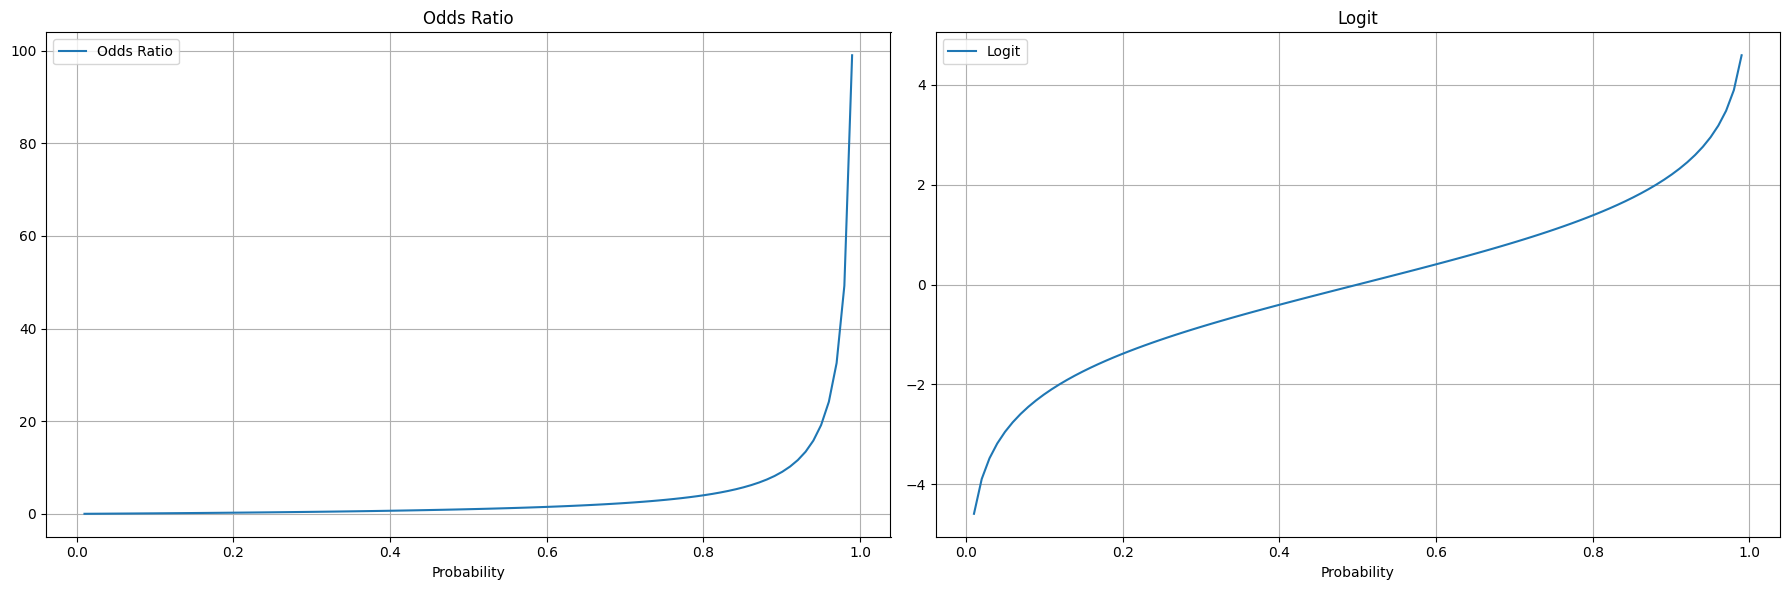

In [ ]:
# prompt: 확률을 x축으로하고 각 컬럼을 시각화해다오 1줄로 각각 3개 그림으로, 그리드도 그리고 tight하게,

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6), tight_layout=True)

df.plot(x='Probability', y='Odds Ratio', ax=axes[0], grid=True)
axes[0].set_title('Odds Ratio')

df.plot(x='Probability', y='Logit', ax=axes[1], grid=True)
axes[1].set_title('Logit')

### **Logistic regression = Sigmoid Fuction**
<img src='https://velog.velcdn.com/images/chiroya/post/b520fcca-ce29-4b02-9392-5de67767e6b4/image.png'>

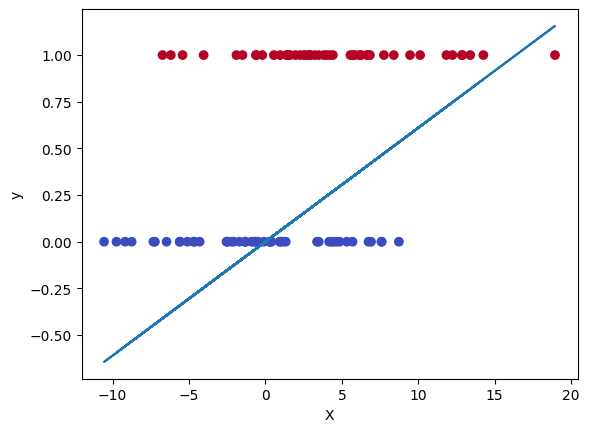

Optimization terminated successfully.
         Current function value: 0.601782
         Iterations 5


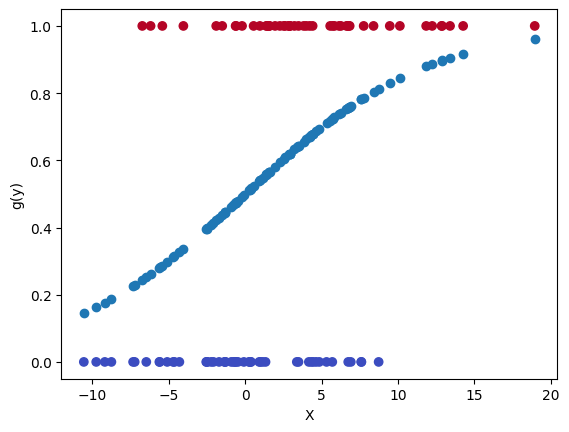

In [ ]:
from sklearn.datasets import make_blobs
import statsmodels.api as sm
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=5)
y_predict = sm.OLS(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.plot(X, y_predict); plt.ylabel('y'); plt.xlabel('X'); plt.show()

y_predict = sm.Logit(y, X).fit().predict(X)
plt.scatter(X[:, 0], y, c=y, cmap='coolwarm')
plt.scatter(X, y_predict); plt.ylabel('g(y)'); plt.xlabel('X');

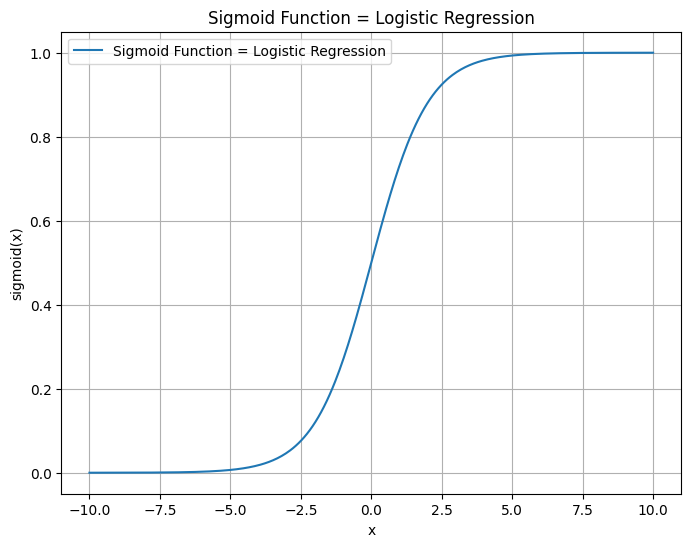

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of values from -10 to 10
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function = Logistic Regression')
plt.title('Sigmoid Function = Logistic Regression')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()


### **1. Probability and Logit**
- **확률**: 이벤트가 발생할 확률을 𝑃 라고 표현할 수 있습니다.
- **로짓 함수**:로짓 함수는 확률 𝑃 오즈(odds)에 자연 로그를 취한 것입니다.

\begin{equation}
P
\end{equation}

\begin{equation}
\text{Logit}(P) = \log\left(\frac{P}{1 - P}\right)
\end{equation}

### **2. Logistic Regression Equation**


<img src='https://lh4.googleusercontent.com/proxy/MeplmTXKAnUuUzgYMEJd_Tg3AIR_NV12Yd3SzleSGZaChDbbicGwVq3ZuESWr4c1Rd2w1BsHWTMjEUDPdpm8EdVwzQjxTBqcKRzqKx06jg'>

- **로지스틱 회귀 방정식**: 로지스틱 회귀 모델은 독립 변수 𝑋의 함수로 종속 변수의 확률 𝑃 를 예측합니다.







\begin{equation}
P = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
\end{equation}

- **로짓 변환(Logit Transformation)**:확률 𝑃에 로짓을 취하면, 종속 변수와 독립 변수 사이의 관계를 선형화할 수 있습니다.
\begin{equation}
\log\left(\frac{P}{1 - P}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
\end{equation}


# <font color='red'>**계수 (𝛽) 의미**
- 양의 계수 : 해당 독립 변수가 증가할수록 종속 변수의 로그 오즈가 증가하여, 발생 확률이 높아짐을 의미합니다.
- 음의 계수 : 해당 독립 변수가 증가할수록 종속 변수의 로그 오즈가 감소하여, 생 확률이 낮아짐을 의미합니다.

### **Odds Ratio 응용사례**

#### **1. 오즈 계산:**

- 흡연자의 오즈: 30/70 = 0.4286
- 비흡연자의 오즈: 20/80 = 0.25

#### **2. 오즈비 계산:**
- 흡연자 오즈비 = (30/70)/(20/80) = (2400/1400) = 1.7143
- 비흡연자 오즈비 =1/1.7143 = 0.5833333

In [ ]:
# 데이터 프레임 생성
data = {'Disease': ['Yes', 'Yes', 'No', 'No'],
        'Smoker': ['Yes', 'No', 'Yes', 'No'],
        'Count': [30, 20, 70, 80]}
df = pd.DataFrame(data)
df
# 교차표 생성
crosstab = pd.pivot_table(df, values='Count', index='Smoker', columns='Disease', aggfunc=np.sum)
crosstab.columns = ['Disease_No', 'Disease_Yes']; crosstab.index = ['Smoker_No', 'Smoker_Yes']
crosstab
# 오즈비 계산
# Use the new row and column names after renaming
odds_ratio = (crosstab.loc['Smoker_Yes', 'Disease_Yes'] * crosstab.loc['Smoker_No', 'Disease_No']) / (crosstab.loc['Smoker_Yes', 'Disease_No'] * crosstab.loc['Smoker_No', 'Disease_Yes'])

print("Odds Ratio:", odds_ratio)

,Disease,Smoker,Count
0,Yes,Yes,30
1,Yes,No,20
2,No,Yes,70
3,No,No,80


,Disease_No,Disease_Yes
Smoker_No,80,20
Smoker_Yes,70,30


Odds Ratio: 1.7142857142857142
